# Assignment 8: Implement Greedy Algorithm

n this exercise, we will begin to explore greedy algorithms and NP complete problems.  

## Deliverables:

 

    1) Assume you run a small security company that provides physical security services in the area and you recently won a new contract in the area to provide 24x7 security to a small building under construction.  
    For simplicity we will design the solution for only 24 hours, but if you want to go above and beyond, feel free to write code that handles the 24x7 scenario as well.

    2) You have 6 security guards available at the moment who you can assign to this building but your goal is to make more money out of this contract and spend less in wages (hence greedy!)
    
    3) The cost/wage structure is as follows:

            People working less than or equal to 8 hours will be paid $15/hr

            Anyone working overtime (>8 hours) will be paid an additional $5, i.e. $20/hr

    4) Create a greedy algorithm (come up with any algorithm of your own) that finds you the most cost effective solution e.g. Should we appoint 2 security guards for 12 hours each? Or 3 of them for 8 hours each? Or 4 for 6 hours each? 
    Or all 6 for 4 hours each? Or any other combination?

            Write the greedy algorithm, run it, and record the solution that your algorithm produces.  Please answer the following questions regarding your solution:

            Explain your algorithm in detail.  How is it greedy?
            What is the complexity of your solution?
            Did the greedy algorithm provide the best solution or could there be an alternative/better solution to your problem?  Why or why not?
            If the scenario had different values for the inputs would your algorithm still be successful?  Eg. more than 24 hours, higher overtime, shorter shifts, or values that don't factor so nicely.  Why or why not?  What things would change the optimal output?
            If you were not constrained to a greedy algorithm, what approaches would you take to solve the problem?  



    
### Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.

# A. Setup: Library imports and Algorithm

In [20]:
import numpy as np
import pandas as pd

import seaborn as sns
import time
#import itertools

import random
import matplotlib.pyplot as plt
#import networkx as nx
#import pydot
#from networkx.drawing.nx_pydot import graphviz_layout

#from collections import deque


In [21]:
def scheduler(max_hours = 24, num_employees =6): 
 
    hours_remain = max_hours #estabilishes a decrementing hours remaining

    schedule = {'worker'+str(v+1): 0 for v in range(0,num_employees)}#dictionary comprehension to build a dictionary of defined number of workers (each worker is a key with hours scheduled as the value)

    while hours_remain > 0: #while loop to decrement hours and add the hour to the worker with the minimum value.
       min_worker = min(schedule, key=schedule.get)
       schedule[min_worker] = schedule.get(min_worker)+1
       hours_remain = hours_remain -1

    
    return schedule  #returns the hours scheduled for each worker

In [22]:
result_24h_6w = scheduler(24,6)


In [23]:
result_table = pd.Series(result_24h_6w) #returns the result as a series
result_table = result_table.to_frame().rename(columns={0:'Hours'}) #converts to dataframe with Hours as column name
hr_sum = float(result_table.sum()) #collects the total sum of hours
result_table['total_days'] = hr_sum/24 #adds a column for the total days of the schedule period
result_table['FractionOfTotalHr'] = result_table.Hours/hr_sum #adds the fractional contribution of a worker to the total hours (not really used)
result_table['HrPerDay'] = result_table.Hours/result_table['total_days'] #adds an aggregate Hours per day column.


base_wage = 15 #sets the base wage
increment_wage = 5 #sets the incremental wage

total_days = result_table.total_days 
HrPerDay = result_table.HrPerDay

result_table['Cost'] = np.where(HrPerDay<8, HrPerDay*total_days*base_wage, 
 (8*total_days*base_wage)+((HrPerDay-8)*total_days*(increment_wage+base_wage))) # adds a cost column if th HrPerDay is over 8 charge the base wage, if over 8 chagen base wage for 8 and the sum of incremental and base wages for the remaining hours.

# B. Results; Schedule Table (only a single 24 hour day)

### Table 1: A single 24 hr day with 6 workers

In [24]:
result_table

,Hours,total_days,FractionOfTotalHr,HrPerDay,Cost
worker1,4,1.0,0.166667,4.0,60.0
worker2,4,1.0,0.166667,4.0,60.0
worker3,4,1.0,0.166667,4.0,60.0
worker4,4,1.0,0.166667,4.0,60.0
worker5,4,1.0,0.166667,4.0,60.0
worker6,4,1.0,0.166667,4.0,60.0


In [25]:
print('The total cost ($) is:', sum(result_table.Cost))

The total cost ($) is: 360.0


### Table2: Simulating 1 week with 6 workers

In [26]:
resultweek = scheduler(168,6)

result_table = pd.Series(resultweek)
result_table = result_table.to_frame().rename(columns={0:'Hours'})
hr_sum = float(result_table.sum())
result_table['total_days'] = hr_sum/24
result_table['FractionOfTotalHr'] = result_table.Hours/hr_sum
result_table['HrPerDay'] = result_table.Hours/result_table['total_days']
result_table


base_wage = 15
increment_wage = 5

total_days = result_table.total_days
HrPerDay = result_table.HrPerDay

result_table['Cost'] = np.where(HrPerDay<8, HrPerDay*total_days*base_wage,
 (8*total_days*base_wage)+((HrPerDay-8)*total_days*(increment_wage+base_wage)))

In [27]:
result_table

,Hours,total_days,FractionOfTotalHr,HrPerDay,Cost
worker1,28,7.0,0.166667,4.0,420.0
worker2,28,7.0,0.166667,4.0,420.0
worker3,28,7.0,0.166667,4.0,420.0
worker4,28,7.0,0.166667,4.0,420.0
worker5,28,7.0,0.166667,4.0,420.0
worker6,28,7.0,0.166667,4.0,420.0


In [28]:
print('The total cost per week ($) is:', sum(result_table.Cost))

The total cost per week ($) is: 2520.0


# C. Demonstrating Computational Complexity

In [29]:
hours_list = [120, 200, 320, 480 ]
worker_list = [30,50,80,120]


In [30]:
returned_schedules = [] 
durations = []
combinations = [(h,w) for h in hours_list for w in worker_list] #returns a factorial of all combinations of workers and hours


In [31]:

for i in combinations:
    start =  time.perf_counter()
    result = scheduler(i[0], i[1])
    end = time.perf_counter()
    duration = (end-start)*1E3
    durations.append(duration)
    returned_schedules.append(result)

Table 3: Computational Complexity of the Greedy Algorithm

In [32]:
df = pd.DataFrame(combinations).rename(columns={0: "Hours", 1: "People"})
df['Time(ms)'] = durations
df

,Hours,People,Time(ms)
0,120,30,0.4750
1,120,50,0.6972
2,120,80,0.9916
3,120,120,1.2266
4,200,30,0.4364
5,200,50,0.5738
6,200,80,1.2096
7,200,120,1.3334
8,320,30,0.6013
9,320,50,0.8815


### Figure 1: Runtime (ms) as a function of number of people by total hours

<AxesSubplot:xlabel='People', ylabel='Time(ms)'>

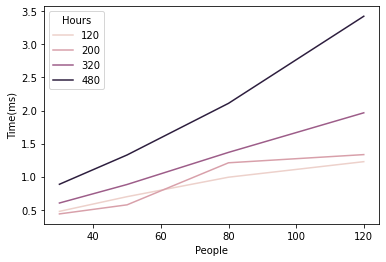

In [33]:
sns.lineplot(data=df, x='People', y='Time(ms)', hue='Hours')

### Figure 2: Runtime (ms) as a function of number of people by total hours

<AxesSubplot:xlabel='Hours', ylabel='Time(ms)'>

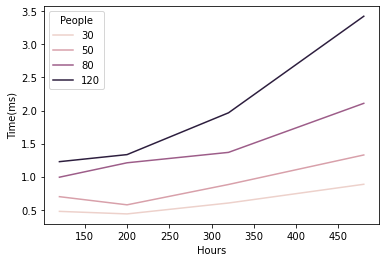

In [34]:
sns.lineplot(data=df, x='Hours', y='Time(ms)', hue='People')

# Discussion


The greedy algorithm that has been developed above makes the assumption that the optimized solution locally (add an additonal hour to the worker who has currently the fewest hours assigned) will result in the global optimized solution. This assumption is then extended to the total cost: the minimum cost will result from incrementing hours for each worker uniformly across all workers. It's important to mention that because the threshold for an incremental wage is 8 hours, and there are only 24 hours in a day, That the cost per day is fixed so long as you have in excess of 3 or more workers for a 24 hour period. The hourly breakdown of 6 workers is shown in table 1. Each line in cost is the per person cumulative wages per that 24 hour period the cumulative cost across all workers is printed below the table. In order to simulate a 7 day a week period with 24 hour coverage. The algorithm was rerun to demonstrate with 6 workers we still do not incur incremental overtime wages. This assumption may not be valid as the market may demand a weekend and shift premium for those working outside of normal business hours. Aditionally there may be increased cost due to holidays that might be incurred. The results of this experiment are shown in table 2. 

As further experimental demonstration of the computational complexity of the algorithm that was developed a factorial experiment was designed between the 2 variables at play in our scheduling function (total hours and number of workers). The results of that experiment and the times required to perform are shown in Table 3. The graphical representations shown in Figure 1 and 2 demonstrate that the time complexity grows linearly as a sum of the number of people and the total hours. This is represented as O(n+m) in big O notation or O(2n). This is logical given the operations of the developed algorithm, the algorithm is required to decrement the total hours and increment the hours to an individual worker. 

Scheduling is a very complex task for example the following are not covered by this algorithm, some have been mentioned previously:

    1) Workers show up late or not at all (sick or otherwise). This may force overtime
    2) Shift premiums are often demanded by the market
    3) Holiday pay is likely a demand of the market
    4) Vacation is often a demand of the market
    5) Wages are often based on years of service or incentivized performance and not fixed across all workers

As such it is a very difficult task to pin down the precise cost based on the incurred hours of workers. In this case the greedy algorithm excels, it makes assumptions and no additonal rule requirements are made. Given the above exceptions additonal complexity in time would be required to develop an algorithm to quantify the combinations of all contributors to cost. Each check of a rule will incur additonal time and combinations of rules will also need to be evaluated. These types of problems grow at factorial rates with respect to time and even though a single calculation can be extremely fast, even a relatively small ammount of hours and workers the computational time can quickly get very large. Greedy algorithms are exactly for this purpose. For estimating a imprecise outcome but doing it very quickly and that is why they are so important to computer scientists, data scientists, and businesses at large.